In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%config InlineBackend.figure_format='svg'

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = load_breast_cancer()
 
data
 
data.data.shape
 
data.target
 
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。过拟合的情况可能存在。

In [48]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()#交叉验证的分类默认scoring='accuracy'
 
score_pre
 
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以上的准确率

0.9648809523809524

### n_estimators参数学习曲线

0.9631265664160402 71


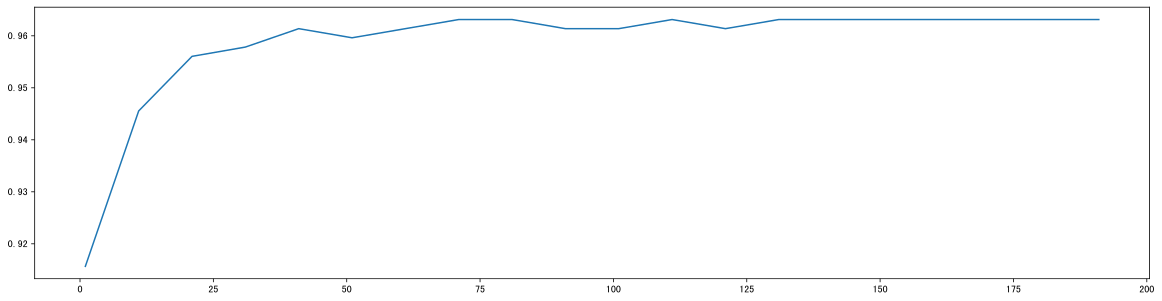

In [4]:
"""
在这里我们选择学习曲线，可以使用网格搜索吗？可以，但是只有学习曲线，才能看见趋势
我个人的倾向是，要看见n_estimators在什么取值开始变得平稳，是否一直推动模型整体准确率的上升等信息
第一次的学习曲线，可以先用来帮助我们划定范围，我们取每十个数作为一个阶段，来观察n_estimators的变化如何
引起模型整体准确率的变化
"""
 
#####【TIME WARNING: 30 seconds】#####
 
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
 
#list.index([object])
#返回这个object在列表list中的索引


0.9613721804511279 41


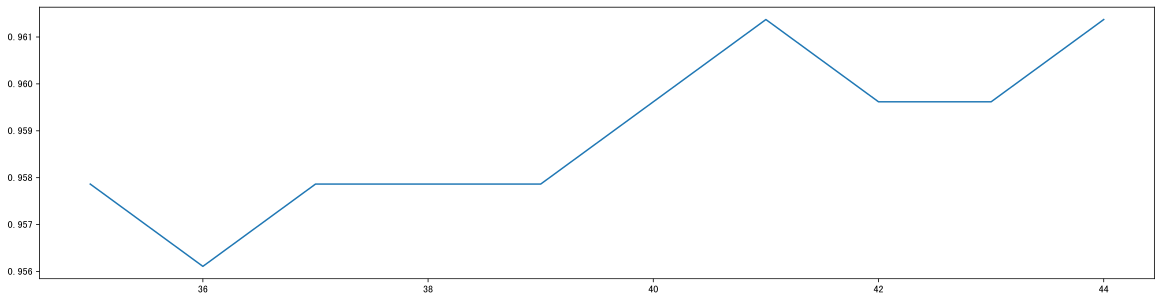

In [5]:
# 缩小刻度明确参数
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                 n_jobs=-1,
                                 random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

In [6]:
"""
有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
从曲线跑出的结果中选取一个更小的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
    
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围
 
有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这
样的参数我们就可以直接跑网格搜索
param_grid = {'criterion':['gini', 'entropy']}
 
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
 
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
    
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""

"\n有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势\n从曲线跑出的结果中选取一个更小的区间，再跑曲线\nparam_grid = {'n_estimators':np.arange(0, 200, 10)}\n \nparam_grid = {'max_depth':np.arange(1, 20, 1)}\n    \nparam_grid = {'max_leaf_nodes':np.arange(25,50,1)}\n    对于大型数据集，可以尝试从1000来构建，先输入1000，每100个叶子一个区间，再逐渐缩小范围\n \n有一些参数是可以找到一个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如何变化，这\n样的参数我们就可以直接跑网格搜索\nparam_grid = {'criterion':['gini', 'entropy']}\n \nparam_grid = {'min_samples_split':np.arange(2, 2+20, 1)}\n \nparam_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}\n    \nparam_grid = {'max_features':np.arange(5,30,1)} \n \n"

### max_depth参数网格搜索

In [17]:
#调整max_depth
 
param_grid = {'max_depth':np.arange(1, 20, 1)}
 
#   一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
#   但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
#   更应该画出学习曲线，来观察深度对模型的影响
 
rfc = RandomForestClassifier(n_estimators=41
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)#网格搜索
GS.fit(data.data,data.target)
 
print(GS.best_params_)#显示调整出来的最佳参数
 
print(GS.best_score_)#返回调整好的最佳参数对应的准确率

{'max_depth': 8}
0.9648809523809524


###  max_feature参数网格搜索

In [19]:
#调整max_features
 
param_grid = {'max_features':np.arange(5,30,1)} 
 
"""
 
max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
最小值。
 
"""
 
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
print(GS.best_params_)
 
print(GS.best_score_)

{'max_features': 15}
0.9666666666666666


### min_samples_leaf参数网格搜索

In [20]:
#调整min_samples_leaf
 
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
 
#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度
 
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,max_features=15
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
print(GS.best_params_)
 
print(GS.best_score_)


{'min_samples_leaf': 1}
0.9666666666666666


### min_samples_split参数网格搜索

In [21]:
#调整min_samples_split
 
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
 
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,max_features=15
                             ,min_samples_leaf=1
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
print(GS.best_params_)
 
print(GS.best_score_)

{'min_samples_split': 2}
0.9666666666666666


### Criterion参数网格搜索

In [22]:
#调整Criterion
 
param_grid = {'criterion':['gini', 'entropy']}
 
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,max_features=15
                             ,min_samples_leaf=1
                             ,min_samples_split=2
                             ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
print(GS.best_params_)
 
print(GS.best_score_)

{'criterion': 'gini'}
0.9666666666666666


###  random_state参数网格搜索

In [42]:
#调整random_state
import time
time_s = time.time()

param_grid = {'random_state':np.arange(0,100,1)}
 
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,max_features=15
                             ,min_samples_leaf=1
                             ,min_samples_split=2
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
 
print(GS.best_params_)
 
print(GS.best_score_)
print('用时：',time.time()-time_s)

{'random_state': 18}
0.968421052631579
用时： 124.65240144729614


In [54]:
rfc = RandomForestClassifier(n_estimators=41
                             ,max_depth=8
                             ,max_features=15
                             ,min_samples_leaf=1
                             ,min_samples_split=2
                             ,criterion='gini'
                             ,random_state=18)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score
 
# 模型优化提高的分数
score - score_pre

0.0035401002506265655